In [1]:
#Importing libraries and setting seed
seed = 45871
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
seed = 45871
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch import arch_model

# Load file and compute additional coloumns 

In [2]:
#Loading the data file

file_path = 'Test data_ascending.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Calculating log returns
df['Log_Returns'] = (np.log(df['Last Price']) - np.log(df['Last Price'].shift(1)))*100

window_size = 2
df['std_dev'] = df['Log_Returns'].rolling(window=window_size).std()

df = df.dropna().reset_index(drop=True)


In [4]:
# Filter the DataFrame to include data from 01/04/2008 onwards 
start_date = '2008-04-03'
df = df[(df['Date'] >= start_date)]

In [5]:
# Split data into training and testing set 
test_size = int(len(df) * 0.2)
df_train = df[:-test_size]
df_test = df[-test_size:]

df_train = df_train.dropna()
df_test = df_test.dropna()

# Parameter estimation for each model

# -> GARCH(1,1) parameter estimation 

In [6]:
# Specify the GARCH(1,1) model
model = arch_model(df_train['Log_Returns'], vol='Garch', p=1, q=1)

# Fit the model using maximum likelihood estimation (MLE)
result = model.fit()

# Display the model summary
print(result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17735.98381841887
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1377915.9012033213
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7955.871953079978
Iteration:      4,   Func. Count:     27,   Neg. LLF: 7938.654904836863
Iteration:      5,   Func. Count:     33,   Neg. LLF: 7917.129084756814
Iteration:      6,   Func. Count:     38,   Neg. LLF: 7920.476878867974
Iteration:      7,   Func. Count:     44,   Neg. LLF: 9852.583493779208
Iteration:      8,   Func. Count:     51,   Neg. LLF: 7916.999408598589
Iteration:      9,   Func. Count:     57,   Neg. LLF: 7915.828253776042
Iteration:     10,   Func. Count:     62,   Neg. LLF: 7915.824170325517
Iteration:     11,   Func. Count:     67,   Neg. LLF: 7915.824166140628
Iteration:     12,   Func. Count:     71,   Neg. LLF: 7915.824166140716
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7915.824166140628
            Iterations: 12


# -> eGARCH parameter estimation

In [7]:
# Specify the eGARCH model
model = arch_model(df_train['Log_Returns'], p=1, o=1, q=1, vol='egarch')

# Fit the model using maximum likelihood estimation (MLE)
egarch_result = model.fit()

# Display the model summary
print(egarch_result.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 909027568115.8491
Iteration:      2,   Func. Count:     17,   Neg. LLF: 262585311603.88757
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2179993471898.189
Iteration:      4,   Func. Count:     37,   Neg. LLF: 717885783393.13
Iteration:      5,   Func. Count:     46,   Neg. LLF: 13263.892395428618
Iteration:      6,   Func. Count:     55,   Neg. LLF: 7919.384484372222
Iteration:      7,   Func. Count:     62,   Neg. LLF: 7918.829905947704
Iteration:      8,   Func. Count:     68,   Neg. LLF: 7918.828875688521
Iteration:      9,   Func. Count:     74,   Neg. LLF: 7918.828833049669
Iteration:     10,   Func. Count:     79,   Neg. LLF: 7918.828833044639
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7918.828833049669
            Iterations: 10
            Function evaluations: 79
            Gradient evaluations: 10
                     Constant Mean - EGARCH Model Results              

# -> GJR-GARCH parameter estimation

In [8]:
# Specify the GJR-GARCH model
model = arch_model(df_train['Log_Returns'], vol='Garch', p=1, o=1, q=1)

# Fit the model using maximum likelihood estimation (MLE)
gjr_result = model.fit()

# Display the model summary
print(gjr_result.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 21135.31313016037
Iteration:      2,   Func. Count:     17,   Neg. LLF: 102294478.55230436
Iteration:      3,   Func. Count:     26,   Neg. LLF: 8080.6040493930195
Iteration:      4,   Func. Count:     33,   Neg. LLF: 8795.621425730407
Iteration:      5,   Func. Count:     40,   Neg. LLF: 7963.90079506931
Iteration:      6,   Func. Count:     47,   Neg. LLF: 7915.765761954278
Iteration:      7,   Func. Count:     54,   Neg. LLF: 7914.315001354651
Iteration:      8,   Func. Count:     61,   Neg. LLF: 7912.501148129813
Iteration:      9,   Func. Count:     68,   Neg. LLF: 8011.149119692613
Iteration:     10,   Func. Count:     76,   Neg. LLF: 7911.989964979663
Iteration:     11,   Func. Count:     83,   Neg. LLF: 7911.988622756948
Iteration:     12,   Func. Count:     89,   Neg. LLF: 7911.988620062119
Iteration:     13,   Func. Count:     94,   Neg. LLF: 7911.988620061477
Optimization terminated successfully    (Exit mode 0)
         

# -> HAR-RV parameter estimation

In [9]:
# Create lagged volatility at different frequencies (daily, weekly, monthly)
df_train['Lag1'] = df_train['std_dev'].shift(1)  # Daily lag
df_train['Lag5'] = df_train['std_dev'].shift(5)  # Weekly lag
df_train['Lag22'] = df_train['std_dev'].shift(22)  # Monthly lag

# Drop missing values
df_train.dropna(inplace=True)

# Define the independent variables (lags)
X = df_train[['Lag1', 'Lag5', 'Lag22']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df_train['std_dev']

# Fit the HAR model using OLS (Ordinary Least Squares) regression (Newey-West)
model = sm.OLS(y, X)
har_result = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1})

# Display the results summary
print(har_result.summary())

                            OLS Regression Results                            
Dep. Variable:                std_dev   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     61.19
Date:                Sat, 11 May 2024   Prob (F-statistic):           1.73e-38
Time:                        10:21:42   Log-Likelihood:                -6943.5
No. Observations:                3277   AIC:                         1.390e+04
Df Residuals:                    3273   BIC:                         1.392e+04
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0338      0.080     13.003      0.0

# Volatility forecast for each model 

# -> GARCH(1,1) forecast

In [10]:
# rolling predictions for GARCH 
garch_rolling_predictions = []
for i in range(test_size):
    train = df.Log_Returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    garch_rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
garch_rolling_predictions = pd.Series(garch_rolling_predictions, index=df_test.index) 
df_test['garch_rolling_predictions'] = garch_rolling_predictions

# -> eGARCH forecast

In [11]:
# rolling predictions for eGARCH 
egarch_rolling_predictions = []
for i in range(test_size):
    train = df.Log_Returns[:-(test_size-i)]
    model = arch_model(train, vol = 'egarch', p=1, o=1, q=1)
    model_fit = model.fit(disp='off')
    egarch_pred = model_fit.forecast(horizon=1)
    egarch_rolling_predictions.append(np.sqrt(egarch_pred.variance.values[-1,:][0]))
    
egarch_rolling_predictions = pd.Series(egarch_rolling_predictions, index=df_test.index) 
df_test['egarch_rolling_predictions'] = egarch_rolling_predictions

# -> GJR-GARCH forecast

In [12]:
# rolling predictions for GJR-GARCH 
gjrgarch_rolling_predictions = []
for i in range(test_size):
    train = df.Log_Returns[:-(test_size-i)]
    model = arch_model(train, p=1, o=1, q=1)
    model_fit = model.fit(disp='off')
    gjr_pred = model_fit.forecast(horizon=1)
    gjrgarch_rolling_predictions.append(np.sqrt(gjr_pred.variance.values[-1,:][0]))
    
gjrgarch_rolling_predictions = pd.Series(gjrgarch_rolling_predictions, index=df_test.index) 
df_test['gjrgarch_rolling_predictions'] = gjrgarch_rolling_predictions

# -> Rolling window forecast 

In [13]:
# rolling predictions for rolling window variance estimator 
def rolling_window_variance(df, window_size):
    # Shift the log returns by one day to exclude the current day's return from the calculation
    shifted_log_returns = df['Log_Returns'].shift(1)

    # Calculate the rolling mean for the shifted log returns
    df['rolling_mean'] = shifted_log_returns.rolling(window=window_size).mean()

    # Function to calculate variance for each window
    def variance_calc(x):
        x = pd.Series(x)
        if len(x.dropna()) == window_size:
            mean = x.mean()
            return ((x - mean) ** 2).sum() / (window_size - 1)
        else:
            return np.nan

    # Apply the variance calculation function on the shifted rolling window
    df['rolling_variance'] = shifted_log_returns.rolling(window=window_size).apply(variance_calc, raw=True)

    # Calculate the rolling standard deviation
    df['rolling_window_predictions'] = np.sqrt(df['rolling_variance'])

    return df

# Setting the window size
window_size = 5  
# Apply the function to dataframe
df = rolling_window_variance(df, window_size)
df_test['rolling_window_predictions'] = df.rolling_window_predictions

# -> HAR-RV forecast 

In [14]:
# predictions for HAR-RV

# Create the same lagged features for the test data as in the training data
df['Lag1'] = df['std_dev'].shift(1)  # Daily lag
df['Lag5'] = df['std_dev'].shift(5)  # Weekly lag
df['Lag22'] = df['std_dev'].shift(22)  # Monthly lag

# Drop NaN values resulting from the lagging operation
df.dropna(inplace=True)

# Define the independent variables for the test data
X_test = df[['Lag1', 'Lag5', 'Lag22']]
X_test = sm.add_constant(X_test)  # Add constant term

# Predict the test period
har_predictions = har_result.predict(X_test)

# Create a Series with the predicted values, setting the correct index
har_predictions = pd.Series(har_predictions, index=df.index)
df_test['har_predictions'] = har_predictions

In [15]:
print(df_test.head())

           Date  Last Price  Log_Returns   std_dev  garch_rolling_predictions  \
4052 2021-01-22       34.17     0.410558  2.269730                   2.908943   
4053 2021-01-25       33.10    -3.181478  2.539953                   2.751820   
4054 2021-01-26       33.29     0.572377  2.654377                   2.832554   
4055 2021-01-27       33.22    -0.210495  0.553574                   2.683957   
4056 2021-01-28       33.89     1.996788  1.560785                   2.542888   

      egarch_rolling_predictions  gjrgarch_rolling_predictions  \
4052                    2.895691                      2.870642   
4053                    2.674716                      2.714397   
4054                    2.892646                      2.837152   
4055                    2.687356                      2.686145   
4056                    2.495128                      2.543661   

      rolling_window_predictions  har_predictions  
4052                    3.978363         2.573360  
4053        

# Plot graf for model comparison

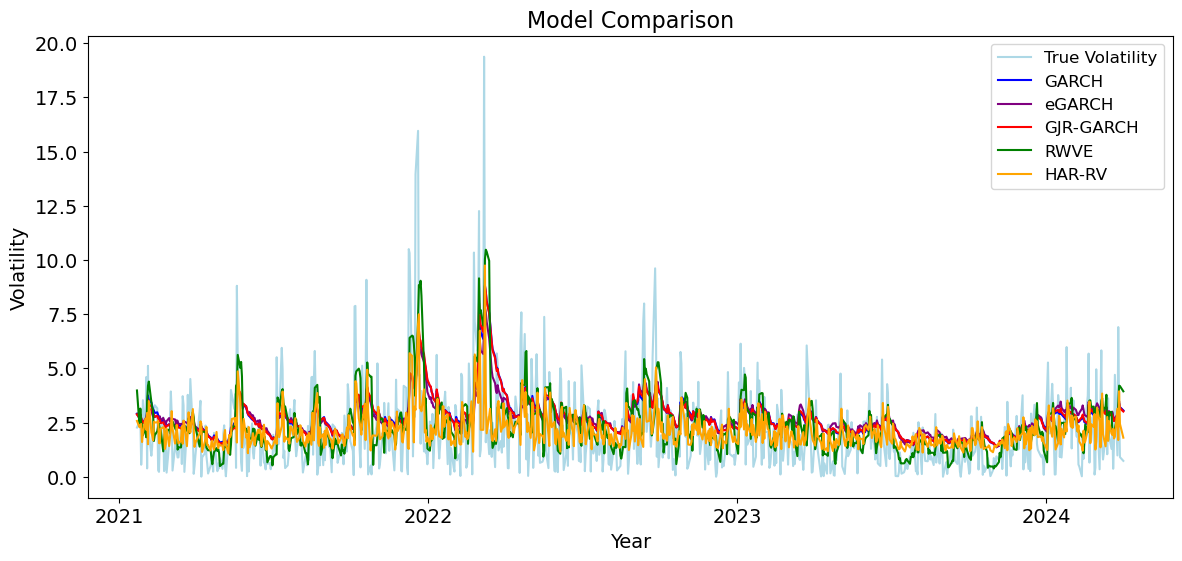

In [16]:
fig, ax = plt.subplots(figsize=(14, 6))

# Plot 'std_dev' and 'predictions'
ax.plot(df_test['Date'], df_test['std_dev'], label='True Volatility', color='lightblue', linewidth=1.5)
ax.plot(df_test['Date'], df_test['garch_rolling_predictions'], label='GARCH', color='blue' ,linewidth=1.5)
ax.plot(df_test['Date'], df_test['egarch_rolling_predictions'], label='eGARCH', color='purple', linewidth=1.5)
ax.plot(df_test['Date'], df_test['gjrgarch_rolling_predictions'], label='GJR-GARCH', color='red', linewidth=1.5)
ax.plot(df_test['Date'], df_test['rolling_window_predictions'], label='RWVE', color='green', linewidth=1.5)
ax.plot(df_test['Date'], df_test['har_predictions'], label='HAR-RV', color='orange', linewidth=1.5)

# Set the x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# More layout 
plt.title('Model Comparison', fontsize = 16 )
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Volatility', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize= 12)
plt.show()


#### 

# Plot graf over volatility split by years 

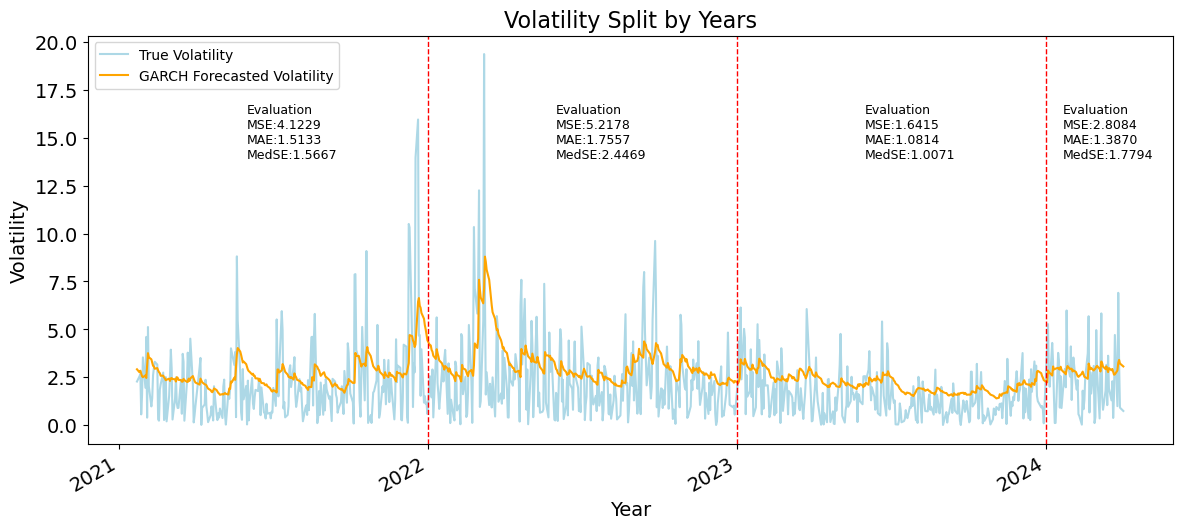

In [17]:
# Yearly estimates for GARCH (2021, 2022, 2023 & 2024)

# Plotting the actual volatility
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_test['Date'], df_test['std_dev'], label='True Volatility', color='lightblue', linewidth=1.5)
ax.plot(df_test['Date'], df_test['garch_rolling_predictions'], label='GARCH Forecasted Volatility', color='orange' ,linewidth=1.5)

# Adding titles and labels
plt.title('Volatility Split by Years', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Volatility', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', fontsize = 10)

# Improve the date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

# Adding vertical lines at specific years
plt.axvline(pd.to_datetime('2022-01-01'), color='red', linestyle='--', linewidth=1)  # Vertical line at 2022
plt.axvline(pd.to_datetime('2023-01-01'), color='red', linestyle='--', linewidth=1)  # Vertical line at 2023
plt.axvline(pd.to_datetime('2024-01-01'), color='red', linestyle='--', linewidth=1)  # Vertical line at 2024


# Specific years with legends
y_position = df_test['std_dev'].max() * 0.72  
plt.text(pd.to_datetime('2021-06-01'), y_position, 'Evaluation\nMSE:4.1229\nMAE:1.5133\nMedSE:1.5667', fontsize=9, backgroundcolor='white')
plt.text(pd.to_datetime('2022-06-01'), y_position, 'Evaluation\nMSE:5.2178\nMAE:1.7557\nMedSE:2.4469', fontsize=9, backgroundcolor='white')
plt.text(pd.to_datetime('2023-06-01'), y_position, 'Evaluation\nMSE:1.6415\nMAE:1.0814\nMedSE:1.0071', fontsize=9, backgroundcolor='white')
plt.text(pd.to_datetime('2024-01-20'), y_position, 'Evaluation\nMSE:2.8084\nMAE:1.3870\nMedSE:1.7794', fontsize=9, backgroundcolor='white')


plt.gcf().autofmt_xdate() 
plt.show()

# Statistics & Box plot for each year 

In [18]:
# Ensure the 'Date' column is in datetime format
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Extract year from the 'Date' and create a new 'Year' column
df_test['Year'] = df_test['Date'].dt.year

# Group the data by the 'Year' column
grouped = df_test.groupby('Year')['std_dev']

# Calculate the mean and median for each year
annual_mean = grouped.mean()
annual_median = grouped.median()

# Print the results
print("Annual Mean of std_dev:\n", annual_mean)
print("Annual Median of std_dev:\n", annual_median)

Annual Mean of std_dev:
 Year
2021    2.136185
2022    2.417794
2023    1.515633
2024    2.373602
Name: std_dev, dtype: float64
Annual Median of std_dev:
 Year
2021    1.665271
2022    1.904544
2023    1.256999
2024    2.224824
Name: std_dev, dtype: float64


In [19]:
# Ensure the 'Date' column is in datetime format
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Extract year from the 'Date' and create a new 'Year' column
df_test['Year'] = df_test['Date'].dt.year

# Group the data by the 'Year' column
grouped = df_test.groupby('Year')['Log_Returns']

# Calculate the mean and median for each year
annual_mean = grouped.mean()
annual_median = grouped.median()

# Print the results
print("Annual Mean of Log Returns:\n", annual_mean)
print("Annual Median of Log Returns:\n", annual_median)

Annual Mean of Log Returns:
 Year
2021    0.351447
2022    0.006088
2023   -0.016668
2024   -0.396114
Name: Log_Returns, dtype: float64
Annual Median of Log Returns:
 Year
2021    0.517961
2022    0.121720
2023   -0.017217
2024   -0.298887
Name: Log_Returns, dtype: float64


In [20]:
df_test['std_dev'].mean()

2.0484998989655194

      Annualized Volatility  Max-Min Range       IQR
Year                                                
2021              42.797628      22.561271  2.861166
2022              52.704788      33.928558  3.406761
2023              32.396529      13.176607  2.641299
2024              22.577216      12.616915  4.186522


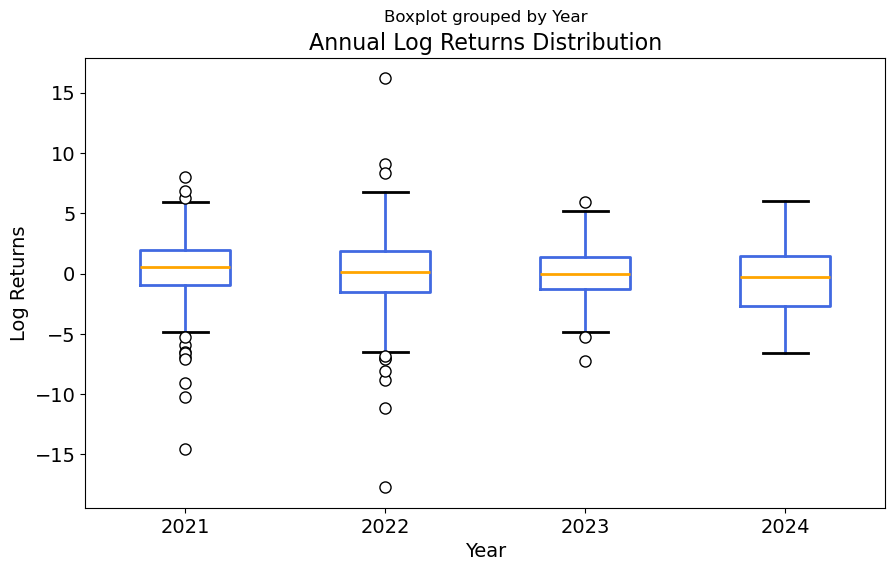

In [21]:
# Set specified index
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Year'] = df_test['Date'].dt.year

# Group data by year
grouped = df_test.groupby('Year')['Log_Returns']

# Calculate Annualized Volatility dynamically based on the number of observations per year
annual_volatility = grouped.std() * (grouped.count() ** 0.5)

# Calculate Range dynamically
annual_range = grouped.max() - grouped.min()

# Calculate IQR
annual_iqr = grouped.quantile(0.75) - grouped.quantile(0.25)

# Create DataFrame for summary table
summary_table = pd.DataFrame({
    'Annualized Volatility': annual_volatility,
    'Max-Min Range': annual_range,
    'IQR': annual_iqr
})

print(summary_table)


# Set design for box plot
boxprops = dict(color="royalblue", linewidth=2)
whiskerprops = dict(color="royalblue", linewidth=2)
flierprops = dict(marker="o", markerfacecolor="white", markersize=8)
medianprops = dict(color="orange", linewidth=2)
capprops = dict(color="black", linewidth=2)

df_test.boxplot(column='Log_Returns', by='Year', grid=False, figsize=(10,6),
                boxprops=boxprops, whiskerprops=whiskerprops,
                flierprops=flierprops, medianprops=medianprops, capprops=capprops)
plt.xticks([1, 2, 3, 4], ['2021', '2022', '2023', '2024'], fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Log Returns', fontsize = 14)
plt.title('Annual Log Returns Distribution', fontsize = 16)
plt.show()